In [63]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont
from IPython.display import display

# read image and convert to RGB
image=Image.open("msi_recruitment.png")
image=image.convert('RGB')

# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
#display(contact_sheet)

In [64]:
# Split the given image into channels R,G,B 

r,g,b = image.split()
singlechannel = [r,g,b]

In [65]:
# 9 images to be attached on canvas in format : 
#
#   (0.1R)GB    (0.5R)GB   (0.9R)GB   
#   R(0.1)GB    R(0.5)GB    R(0.9)GB
#   RG(0.1)B    RG(0.5)B    RG(0.9)B 
#
#________________________________________________

# attach channel information in text box below each image in every row 


In [66]:
# Create font object with provided font, set font type and font size 
font = ImageFont.truetype(
    "/Users/saurabhkumarsingh/Documents/GitHub/Learning_python/UoM_Specializations/P3_C5_Python Projectpillow tesseract and opencv/Files/home/jovyan/work/readonly/fanwood-webfont.ttf", 75)


In [67]:
# 3 lists containing single channel images of varying intensity 0.1 , 0.5 , 0.9 

Rimages = []
Gimages = []
Bimages = []

for i in [0.1,0.5,0.9]:
    new = r.point(lambda a: a * i)
    Rimages.append(new)
for i in [0.1,0.5,0.9]:
    new = g.point(lambda a: a * i)
    Gimages.append(new)
for i in [0.1,0.5,0.9]:
    new = b.point(lambda a: a * i)
    Bimages.append(new)
    



In [68]:
# creating rows for canvas 
firstrow = []
secondrow = []
thirdrow = []

# Creating single images to put in canvas rowwise, and adding text to be added at thier bottom. 

intensity = [0.1,0.5,0.9]

for R , i in zip(Rimages,intensity): # create a tuple with first image and its intensity as an integer
    new = Image.merge('RGB', (R, g, b)) # creating new image by merging with decreased R channel and B,G original channel
    Rtext = PIL.Image.new('RGB', (R.width,R.height + 100)) # added space to add text 
    Rtext.paste(new) # added newly created image with space for text 
    drawing_object = ImageDraw.Draw(Rtext) # drawing object 
    drawing_object.text((5,R.height + 20) , text = f"channel 0 intensity {i}" , font=font  ) # adding bottom text under each image
    firstrow.append(Rtext) # adding al images of first row 
    
for G, i in zip(Gimages, intensity):
    new = Image.merge('RGB', (r, G, b))
    Gtext = PIL.Image.new('RGB', (G.width, G.height + 100))
    Gtext.paste(new)
    drawing_object = ImageDraw.Draw(Gtext)
    drawing_object.text((5, G.height + 20),
                        text=f"channel 1 intensity {i}", font=font)
    secondrow.append(Gtext)
for B, i in zip(Bimages, intensity):
    new = Image.merge('RGB', (r, g, B))
    Btext = PIL.Image.new('RGB', (B.width, B.height + 100))
    Btext.paste(new)
    drawing_object = ImageDraw.Draw(Btext)
    drawing_object.text((5, B.height + 20),
                        text=f"channel 2 intensity {i}", font=font)
    secondrow.append(Btext)

allimages = firstrow[:] + secondrow[:] + thirdrow[:] # all images to be added on canvas 

In [69]:
# Create a canvas 3*Width of original Image and 3*(heignt + height of textbox= )

final_canvas = PIL.Image.new('RGB', (allimages[0].width*3,(allimages[0].height)*3))


In [70]:
# putting images on canvas with textbox below them 
x=0
y=0

for img in allimages:
    # pasting img to canvas
    
    final_canvas.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x + image.width == final_canvas.width:
        x = 0
        y = y + image.height + 100 
    else:
        x = x + image.width



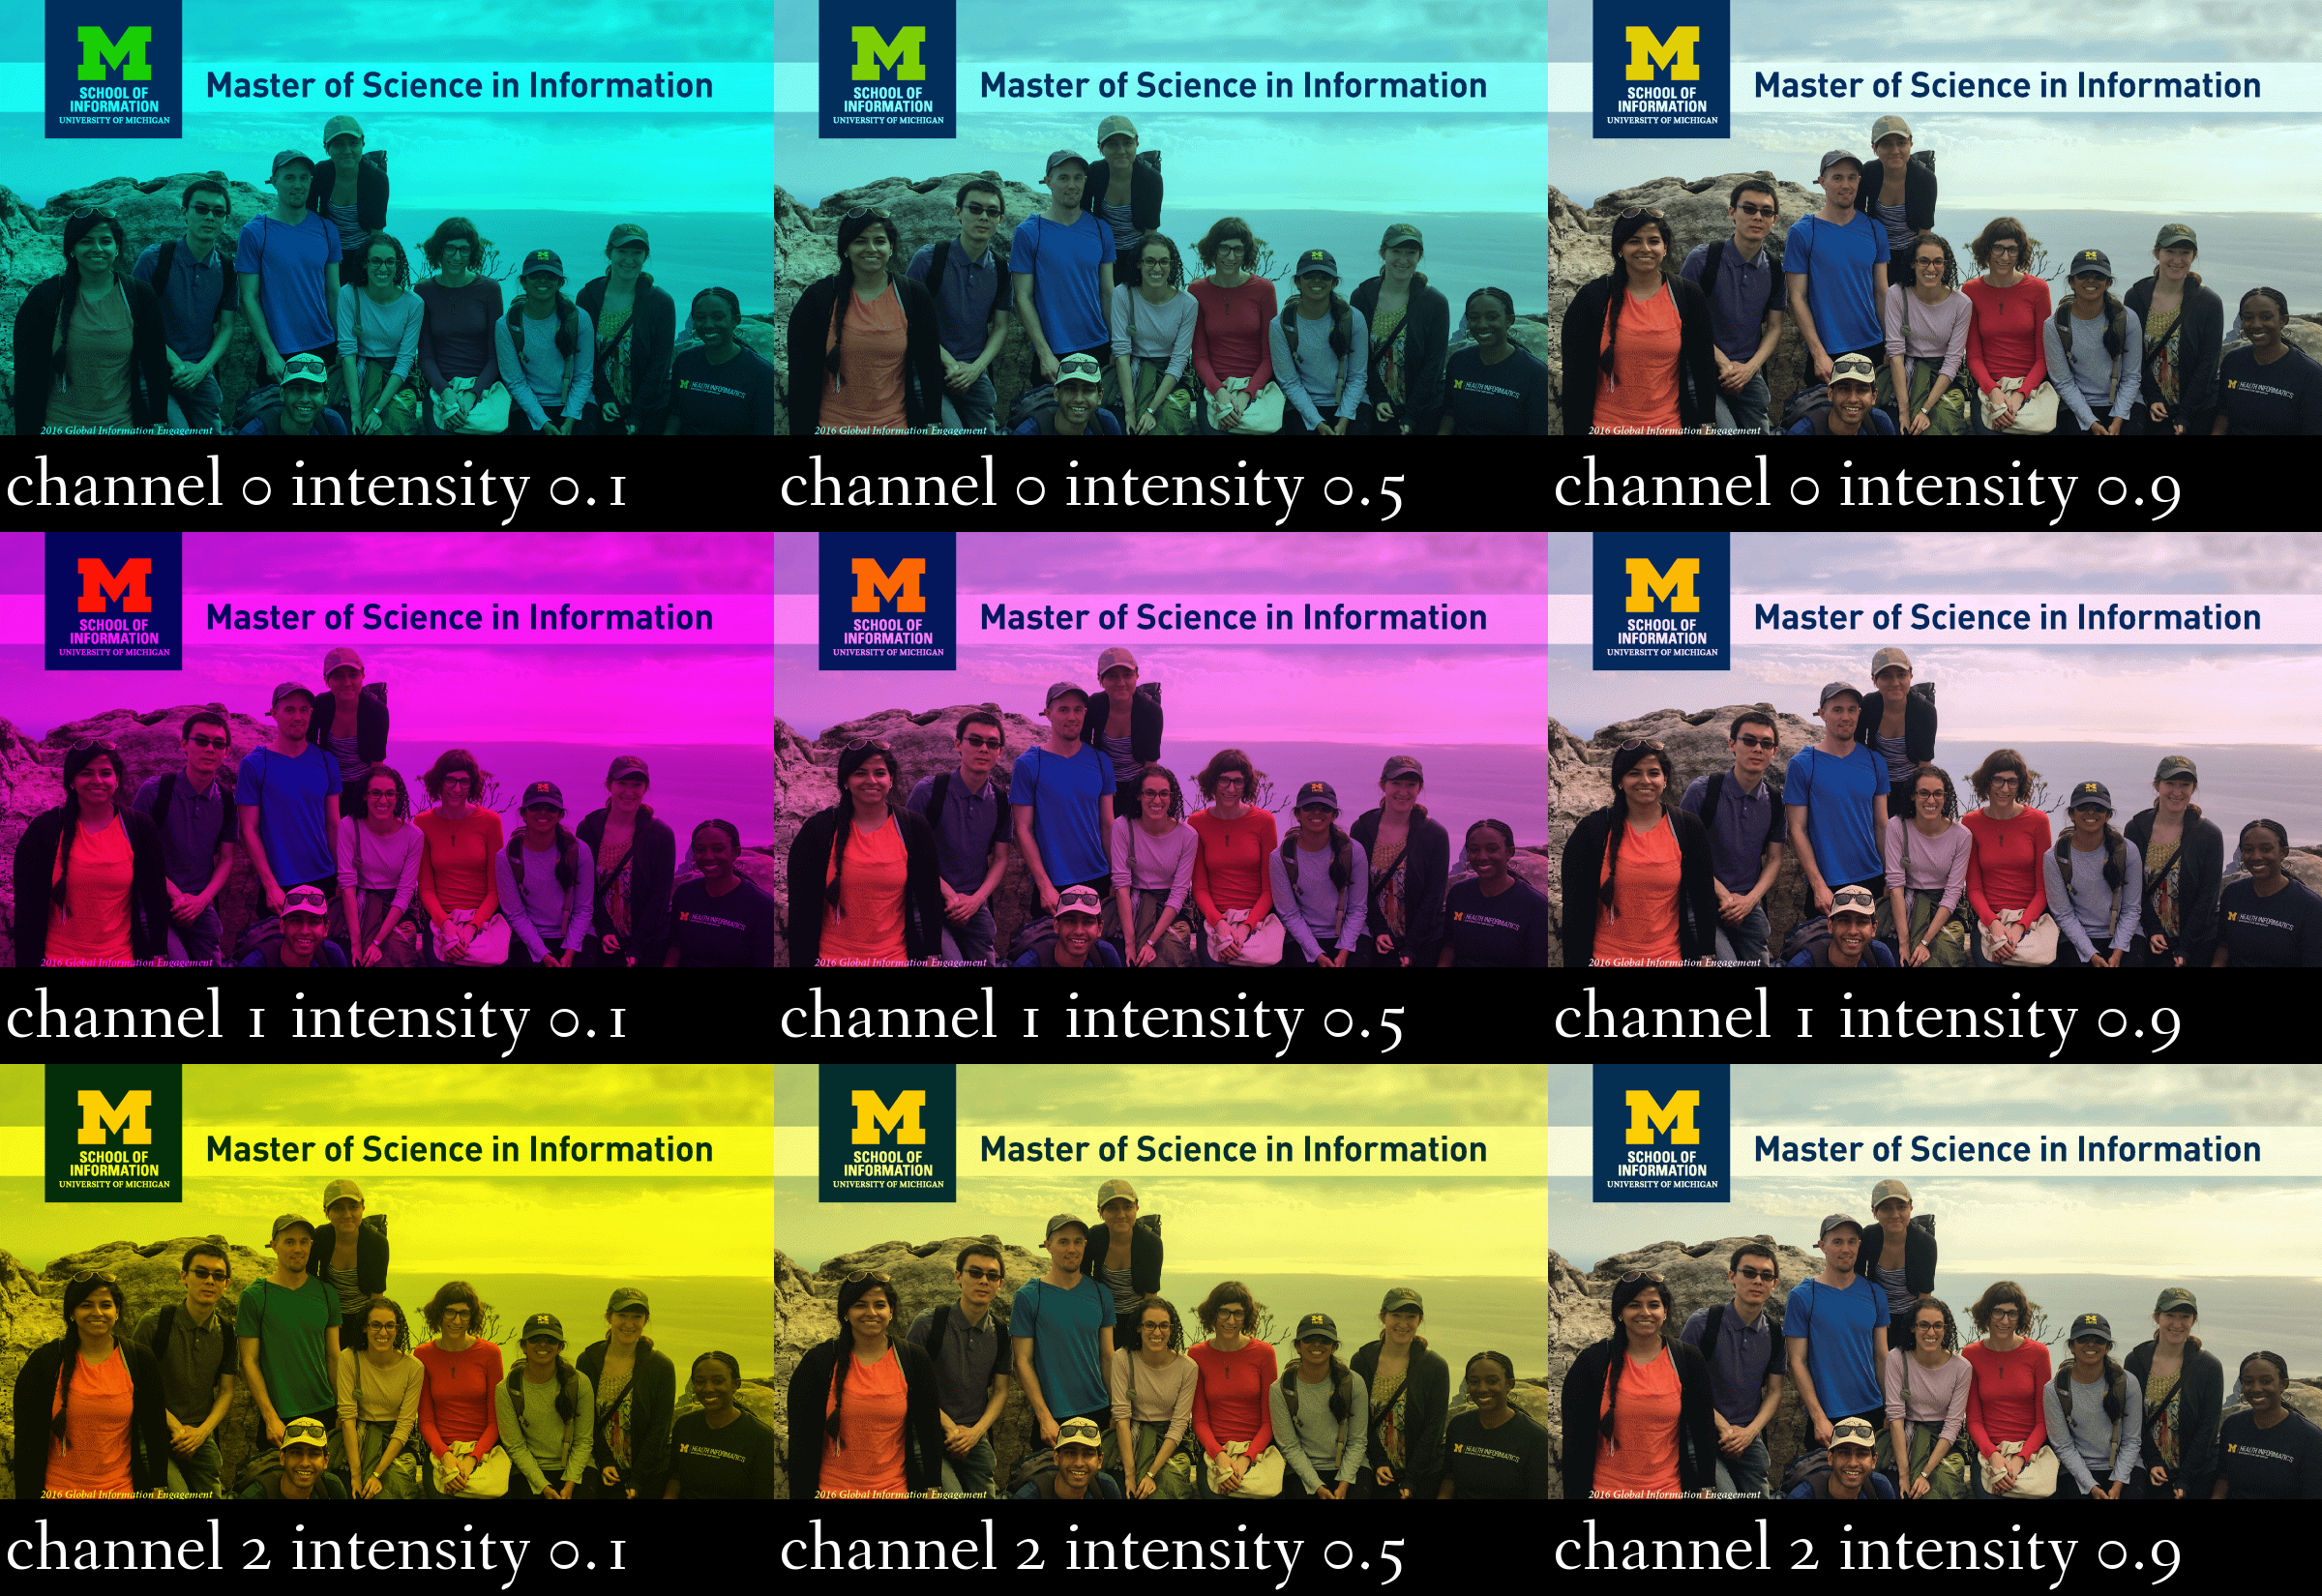

In [71]:
display(final_canvas)

In [73]:
final_canvas.save('final_canvas_submit.jpg')